Import pandas and load data

In [203]:
import pandas as pd

In [204]:
df_math = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")

df_math['course'] = 'Math'
df_por['course'] = 'Portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


Check data info and missing values

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [206]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [207]:
student_data.duplicated().sum()

np.int64(0)

In [208]:
df = df.drop_duplicates()
df.shape

(1044, 34)

In [209]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Creation of grade categories

In [210]:
def categorize_grade(g3):
    if g3 < 10:
        return 'Fail'
    elif g3 < 12:
        return 'Sufficient'
    elif g3 < 14:
        return 'Satisfactory'
    elif g3 < 16:
        return 'Good'
    else: 
        return 'Excellent'

df['Grade_Category'] = df['G3'].apply(categorize_grade)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,course,Grade_Category
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,Math,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,Math,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,Math,Sufficient
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,Math,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,Math,Sufficient


Encode Binary Variables

In [211]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Grade_Category')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df. head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,course,Grade_Category
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,0,Fail
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,0,Fail
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,0,Sufficient
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,0,Good
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,0,Sufficient


Encode Target Variable

In [212]:
target_encoder = LabelEncoder()
df['Grade_Category'] = target_encoder.fit_transform(df['Grade_Category'])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,course,Grade_Category
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,0,1
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,0,1
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,0,4
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,0,2
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,0,4


Prepare Features and Target (Version 1 - With G1, G2)

In [213]:
X_v1 = df.drop(columns=['Grade_Category', 'G3'])
y = df['Grade_Category']

X_v1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,course
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,0
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,0


Prepare Features and Target (Version 2 - Without G1, G2)

In [214]:
X_v2 = df.drop(columns=['Grade_Category', 'G3', 'G1', 'G2'])
X_v2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,course
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,0
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,0


Train-test split

In [215]:
from sklearn.model_selection import train_test_split

X_train_v1, X_test_v1, y_train, y_test = train_test_split(X_v1, y, test_size=0.2, random_state=42)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y, test_size=0.2, random_state=42)

X_train_v1.shape, X_test_v1.shape

((835, 33), (209, 33))

Feature Scaling

In [216]:
from sklearn.preprocessing import StandardScaler

scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.transform(X_test_v1)

scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_v2)
X_test_v2_scaled = scaler_v2.transform(X_test_v2)

Import Models

In [217]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Define Models

In [218]:
models = {
    "Random_Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

Train and Evaluate Models (Version 1)

In [219]:
from sklearn.metrics import classification_report, accuracy_score

results_v1 = {}

for name, model in models.items():
    model.fit(X_train_v1_scaled, y_train)
    y_pred = model.predict(X_test_v1_scaled)
    acc = accuracy_score(y_test, y_pred)
    results_v1[name] = acc
    
results_v1

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


{'Random_Forest': 0.7177033492822966,
 'AdaBoost': 0.6028708133971292,
 'KNN': 0.47368421052631576}

Classification Reports (Version 1)

In [220]:
for name, model in models.items():
    model.fit(X_train_v1_scaled, y_train)
    y_pred = model. predict(X_test_v1_scaled)
    report = classification_report(y_test, y_pred)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Train and Evaluate Models (Version 2)

In [221]:
results_v2 = {}

for name, model in models.items():
    model.fit(X_train_v2_scaled, y_train_v2)
    y_pred = model.predict(X_test_v2_scaled)
    acc = accuracy_score(y_test_v2, y_pred)
    results_v2[name] = acc
    
results_v2

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


{'Random_Forest': 0.37320574162679426,
 'AdaBoost': 0.31100478468899523,
 'KNN': 0.3349282296650718}

Model Comparison

In [222]:
comparison = pd.DataFrame({
    'Version_1_With_G1_G2': results_v1,
    'Version_2_Without_G1_G2': results_v2
})

comparison

,Version_1_With_G1_G2,Version_2_Without_G1_G2
Random_Forest,0.717703,0.373206
AdaBoost,0.602871,0.311005
KNN,0.473684,0.334928


Feature Importance (Random Forest)

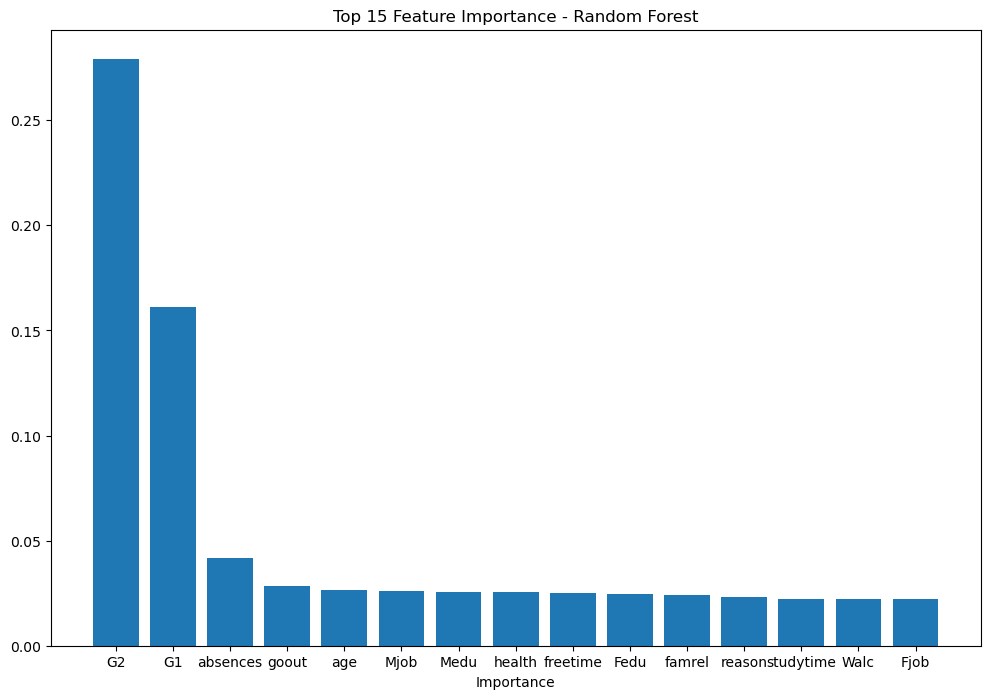

In [223]:
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_v1_scaled, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_v1.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.show()

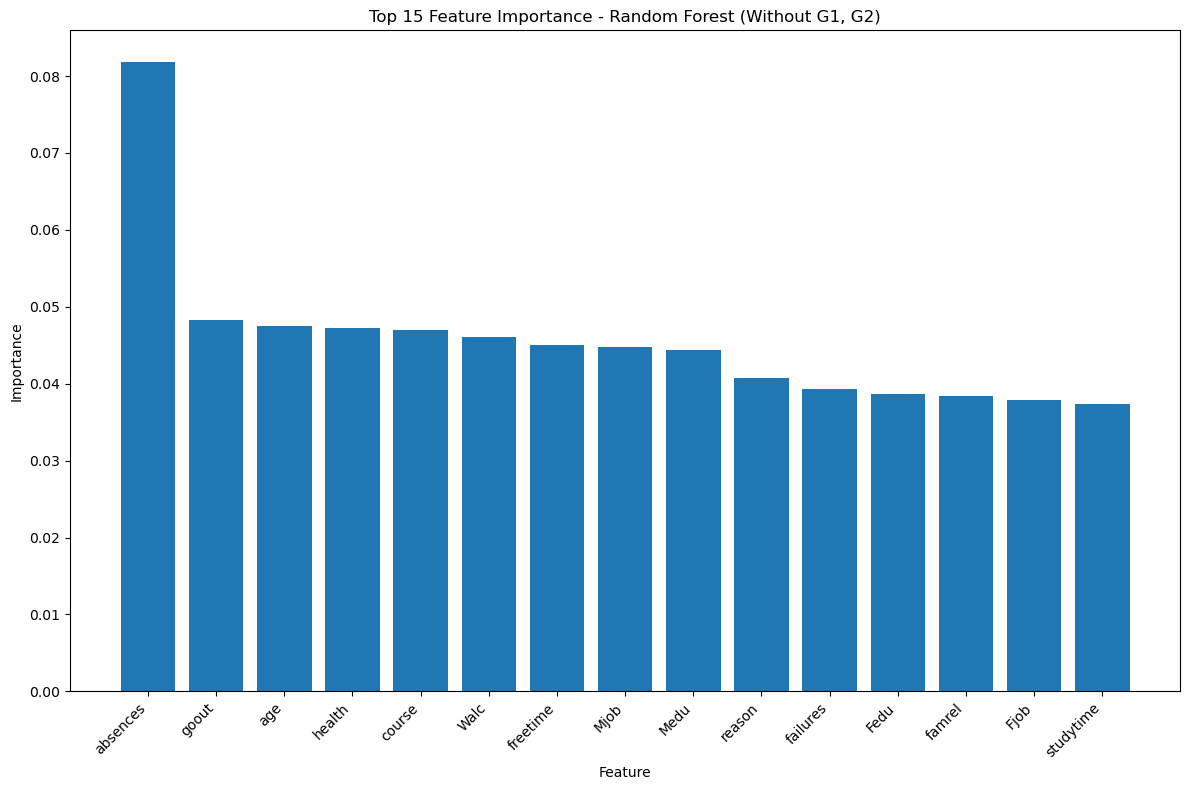

In [229]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

rf_model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_v2.fit(X_train_v2_scaled, y_train_v2)

# Use X_train_v2.columns instead of X_without_grades.columns
feature_importance_v2 = (
    pd.DataFrame({
        'Feature': X_train_v2.columns,
        'Importance': rf_model_v2.feature_importances_
    })
    .sort_values('Importance', ascending=False)
)

plt.figure(figsize=(12, 8))
plt.bar(feature_importance_v2['Feature'][:15], feature_importance_v2['Importance'][:15])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 15 Feature Importance - Random Forest (Without G1, G2)')
plt.tight_layout()
plt.show()

KMeans Clustering 

In [184]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_v1)

df['Cluster'].value_counts()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Cluster
1    387
3    375
0    202
2     75
4      5
Name: count, dtype: int64

In [185]:
import numpy as np

new_student = np.array([[17, 3, 2, 1, 2, 0, 4, 3, 2, 1, 2, 4, 5, 12, 13, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]])

new_student_scaled = scaler_v1.transform(new_student)

rf_pred = rf_model.predict(new_student_scaled)
predicted_category = target_encoder.inverse_transform(rf_pred)

predicted_category[0]

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Fail'

In [228]:
import numpy as np

new_student = np.array([[17, 3, 2, 1, 2, 0, 4, 3, 2, 1, 2, 4, 5, 12, 13, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]])

new_student_scaled = scaler_v1.transform(new_student)

rf_pred = rf_model.predict(new_student_scaled)
predicted_category = target_encoder.inverse_transform(rf_pred)

predicted_category[0]

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Fail'